# Scatter Plot analysis toward the number of tweets and statistics of covid-19 in 4 English-spoken country and 3 states in US

This notebook PLOT the number of tweets with 3 different states in US and the states of four English-spoken countries including US, UK, Australia and Canada

In [1]:
#import the important library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json as js
import ast
import re
import networkx as nx
from datetime import datetime
from datetime import timedelta
import branca.colormap as cm
from branca.colormap import linear

In [2]:
#read the file of covid
covid_df = pd.read_csv("international-covid-data.csv")
covid_df['new_cases'].fillna(0)
covid_df['new_deaths'].fillna(0)

#remove the date that is out of the bounb 
def check_date_inbound(df):
    start_date = datetime.strptime('2020-03-19', '%Y-%m-%d')
    delta = int((datetime.strptime(df['date'], '%Y-%m-%d')-start_date).days)
    if delta < 0:
        return False
    else:
        return True

covid_df['date_inbound'] = covid_df.apply(check_date_inbound,axis = 1)
covid_df = covid_df[covid_df['date_inbound'] == True]
del covid_df['date_inbound']

#get the week index
def get_week_index(df):
    start_date = datetime.strptime('2020-03-19', '%Y-%m-%d')
    delta = int((datetime.strptime(df['date'], '%Y-%m-%d')-start_date).days)    
    return int(delta/7)

covid_df['week_index'] = covid_df.apply(get_week_index,axis = 1)
covid_df 

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality,week_index
24,AFG,Asia,Afghanistan,2020-03-19,25.0,1.0,1.857,NaN,NaN,0.000,...,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,0
25,AFG,Asia,Afghanistan,2020-03-20,29.0,4.0,2.286,NaN,NaN,0.000,...,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,0
26,AFG,Asia,Afghanistan,2020-03-21,30.0,1.0,2.143,NaN,NaN,0.000,...,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,0
27,AFG,Asia,Afghanistan,2020-03-22,34.0,4.0,2.571,1.0,1.0,0.143,...,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,0
28,AFG,Asia,Afghanistan,2020-03-23,41.0,7.0,3.286,1.0,0.0,0.143,...,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99351,ZWE,Africa,Zimbabwe,2021-06-26,46018.0,801.0,627.143,1725.0,4.0,8.429,...,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN,66
99352,ZWE,Africa,Zimbabwe,2021-06-27,46442.0,424.0,666.143,1736.0,11.0,9.143,...,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN,66
99353,ZWE,Africa,Zimbabwe,2021-06-28,47284.0,842.0,727.000,1749.0,13.0,9.143,...,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN,66
99354,ZWE,Africa,Zimbabwe,2021-06-29,48533.0,1249.0,831.286,1761.0,12.0,10.000,...,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN,66


In [3]:
#read the number of count at usa
us_covid_df = covid_df[covid_df['iso_code']=="USA"]
us_twitter_df = pd.read_csv("us_weekly_counts.csv")


del us_twitter_df['Unnamed: 0']

#get the value of case and death
def get_new_cases_value(df):
    temp_df = us_covid_df[us_covid_df['week_index']==df['week_index']]
    return temp_df['new_cases'].mean()

us_twitter_df['new_cases'] = us_twitter_df.apply(get_new_cases_value,axis = 1)

def get_new_death_value(df):
    temp_df = us_covid_df[us_covid_df['week_index']==df['week_index']]
    return temp_df['new_deaths'].mean()

us_twitter_df['new_deaths'] = us_twitter_df.apply(get_new_death_value,axis = 1)

us_twitter_df.sort_values(by = 'week_index',ascending=False)

,week_index,Count,new_cases,new_deaths
31,49,9644.428571,64755.428571,1867.571429
39,48,7746.142857,68745.571429,2138.857143
40,47,7491.857143,77814.857143,2086.857143
36,46,8709.428571,104757.571429,2785.571429
34,45,9182.428571,137428.142857,3096.857143
28,44,9872.428571,162833.857143,3318.285714
32,43,9600.428571,194487.142857,3123.428571
37,42,8433.857143,245701.142857,3432.428571
24,41,10629.857143,224787.857143,2756.000000
23,40,10652.000000,183222.428571,2436.285714


<AxesSubplot:title={'center':'US new confirmed cases vs tweets number'}, xlabel='number of tweets', ylabel='number of new confirmed cases'>

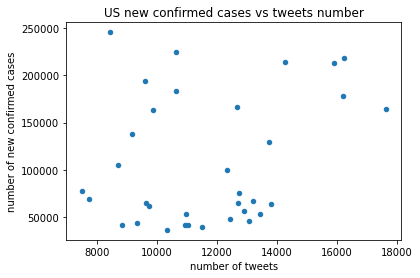

In [4]:
us_twitter_df = us_twitter_df[us_twitter_df['week_index']>15]
us_twitter_df.plot.scatter(x = 'Count', y = 'new_cases',xlabel = 'number of tweets', ylabel = 'number of new confirmed cases',title = 'US new confirmed cases vs tweets number')

<AxesSubplot:title={'center':'US new death cases vs tweets number'}, xlabel='number of tweets', ylabel='number of new death cases'>

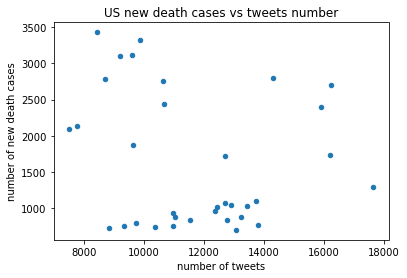

In [5]:
us_twitter_df.plot.scatter(x = 'Count', y = 'new_deaths',xlabel = 'number of tweets', ylabel = 'number of new death cases',title = 'US new death cases vs tweets number')

In [6]:
#read the number of count at usa
ca_covid_df = covid_df[covid_df['iso_code']=="CAN"]
ca_twitter_df = pd.read_csv("us_weekly_counts.csv")


del ca_twitter_df['Unnamed: 0']

#get the value of case and death
def get_new_cases_value(df):
    temp_df = ca_covid_df[ca_covid_df['week_index']==df['week_index']]
    return temp_df['new_cases'].mean()

ca_twitter_df['new_cases'] = ca_twitter_df.apply(get_new_cases_value,axis = 1)

def get_new_death_value(df):
    temp_df = ca_covid_df[ca_covid_df['week_index']==df['week_index']]
    return temp_df['new_deaths'].mean()

ca_twitter_df['new_deaths'] = ca_twitter_df.apply(get_new_death_value,axis = 1)

ca_twitter_df.sort_values(by = 'week_index',ascending=False)

,week_index,Count,new_cases,new_deaths
31,49,9644.428571,2926.714286,42.142857
39,48,7746.142857,3027.571429,53.000000
40,47,7491.857143,2914.285714,61.714286
36,46,8709.428571,3477.571429,92.285714
34,45,9182.428571,4056.142857,125.142857
28,44,9872.428571,5098.428571,131.142857
32,43,9600.428571,6302.714286,146.857143
37,42,8433.857143,7820.714286,142.857143
24,41,10629.857143,7742.857143,127.000000
23,40,10652.000000,6394.285714,128.285714


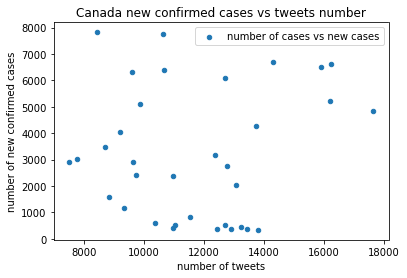

In [7]:
ca_twitter_df = ca_twitter_df[ca_twitter_df['week_index']>15]
ax = ca_twitter_df.plot.scatter(x = 'Count', y = 'new_cases', label = 'number of cases vs new cases',xlabel = 'number of tweets', ylabel = 'number of new confirmed cases',title = 'Canada new confirmed cases vs tweets number')

<AxesSubplot:title={'center':'Canada new death cases vs tweets number'}, xlabel='number of tweets', ylabel='number of new death cases'>

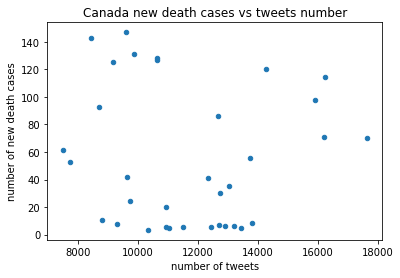

In [8]:
ca_twitter_df.plot.scatter(x = 'Count', y = 'new_deaths', xlabel = 'number of tweets', ylabel = 'number of new death cases',title = 'Canada new death cases vs tweets number')

In [9]:
#read the number of count at usa
uk_covid_df = covid_df[covid_df['iso_code']=="GBR"]
uk_twitter_df = pd.read_csv("uk_weekly_counts.csv")


del uk_twitter_df['Unnamed: 0']

#get the value of case and death
def get_new_cases_value(df):
    temp_df = uk_covid_df[uk_covid_df['week_index']==df['week_index']]
    return temp_df['new_cases'].mean()

uk_twitter_df['new_cases'] = uk_twitter_df.apply(get_new_cases_value,axis = 1)

def get_new_death_value(df):
    temp_df = uk_covid_df[uk_covid_df['week_index']==df['week_index']]
    return temp_df['new_deaths'].mean()

uk_twitter_df['new_deaths'] = uk_twitter_df.apply(get_new_death_value,axis = 1)

uk_twitter_df.sort_values(by = 'week_index',ascending=False)

,week_index,Count,new_cases,new_deaths
30,49,3339.714286,7201.857143,291.142857
13,48,4370.428571,10515.857143,402.857143
20,47,3993.428571,12322.714286,584.428571
19,46,4007.714286,16265.857143,788.714286
6,45,4919.428571,22476.428571,1066.000000
4,44,5324.571429,29977.285714,1230.857143
5,43,5075.285714,42120.428571,1222.714286
2,42,6289.857143,53669.714286,1062.857143
1,41,7264.285714,57866.142857,687.571429
23,40,3739.285714,40601.000000,500.000000


<AxesSubplot:title={'center':'UK new confirmed cases vs tweets number'}, xlabel='number of tweets', ylabel='number of new confirmed cases'>

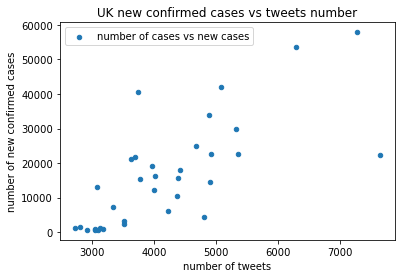

In [10]:
uk_twitter_df = uk_twitter_df[uk_twitter_df['week_index']>15]
uk_twitter_df.plot.scatter(x = 'Count', y = 'new_cases', label = 'number of cases vs new cases',xlabel = 'number of tweets', ylabel = 'number of new confirmed cases',title = 'UK new confirmed cases vs tweets number')

<AxesSubplot:title={'center':'UK new death cases vs tweets number'}, xlabel='number of tweets', ylabel='number of new death cases'>

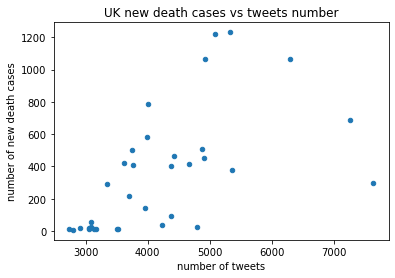

In [11]:
uk_twitter_df.plot.scatter(x = 'Count', y = 'new_deaths',xlabel = 'number of tweets', ylabel = 'number of new death cases',title = 'UK new death cases vs tweets number')

In [12]:
au_covid_df = covid_df[covid_df['iso_code']=="AUS"]
au_twitter_df = pd.read_csv("au_weekly_counts.csv")


del au_twitter_df['Unnamed: 0']

#get the value of case and death
def get_new_cases_value(df):
    temp_df = au_covid_df[au_covid_df['week_index']==df['week_index']]
    return temp_df['new_cases'].mean()

au_twitter_df['new_cases'] = au_twitter_df.apply(get_new_cases_value,axis = 1)

def get_new_death_value(df):
    temp_df = au_covid_df[au_covid_df['week_index']==df['week_index']]
    return temp_df['new_deaths'].mean()

au_twitter_df['new_deaths'] = au_twitter_df.apply(get_new_death_value,axis = 1)

au_twitter_df.sort_values(by = 'week_index',ascending=False)

,week_index,Count,new_cases,new_deaths
44,49,263.285714,8.571429,0.000000
37,48,371.571429,5.000000,0.000000
2,47,766.142857,4.714286,0.000000
34,46,417.285714,5.857143,0.000000
15,45,579.000000,6.285714,0.000000
38,44,354.000000,6.428571,0.000000
25,43,474.428571,12.714286,0.000000
20,42,523.714286,16.285714,0.000000
9,41,670.142857,20.142857,0.000000
21,40,515.142857,20.428571,0.142857


<AxesSubplot:title={'center':'Australia new confirmed cases vs tweets number'}, xlabel='number of tweets', ylabel='number of new confirmed cases'>

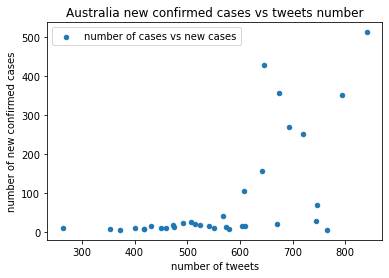

In [13]:
au_twitter_df = au_twitter_df[au_twitter_df['week_index']>15]
au_twitter_df.plot.scatter(x = 'Count', y = 'new_cases', label = 'number of cases vs new cases',xlabel = 'number of tweets', ylabel = 'number of new confirmed cases',title = 'Australia new confirmed cases vs tweets number')

<AxesSubplot:title={'center':'Australia new death cases vs tweets number'}, xlabel='number of tweets', ylabel='number of new death cases'>

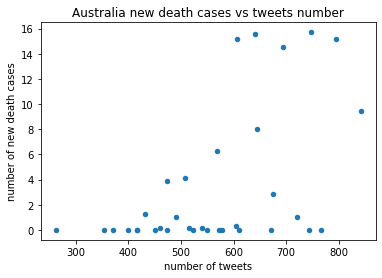

In [14]:
au_twitter_df.plot.scatter(x = 'Count', y = 'new_deaths', xlabel = 'number of tweets', ylabel = 'number of new death cases',title = 'Australia new death cases vs tweets number')

In [15]:
#Analysize to the data of invidual states in US scatter plot
#read the file of covid data in us
covid_states_df = pd.read_csv("all-states-history.csv",usecols = ['date','deathIncrease','state','positiveIncrease',])
covid_states_df['deathIncrease'].fillna(0)
covid_states_df['positiveIncrease'].fillna(0)
covid_states_df['date_inbound'] = covid_states_df.apply(check_date_inbound,axis = 1)
covid_states_df = covid_states_df[covid_states_df['date_inbound'] == True]
del covid_states_df['date_inbound']
covid_states_df['week_index'] = covid_states_df.apply(get_week_index,axis = 1)
covid_states_df 

,date,state,deathIncrease,positiveIncrease,week_index
0,2021-03-07,AK,0,0,50
1,2021-03-07,AL,-1,408,50
2,2021-03-07,AR,22,165,50
3,2021-03-07,AS,0,0,50
4,2021-03-07,AZ,5,1335,50
...,...,...,...,...,...
19819,2020-03-19,VT,0,2,0
19820,2020-03-19,WA,10,268,0
19821,2020-03-19,WI,0,53,0
19822,2020-03-19,WV,0,1,0


In [16]:
#read the file of tweets by country
covid_tweets_states_df = pd.read_csv("us_states_weekly_counts.csv")
del covid_tweets_states_df['Unnamed: 0']
covid_tweets_states_df

,States,Count,Week_index
0,CA,691.000000,0
1,TX,534.857143,0
2,NY,351.285714,0
3,FL,242.714286,0
4,GA,197.000000,0
...,...,...,...
2395,MT,14.714286,49
2396,SD,13.571429,49
2397,DE,12.714286,49
2398,ND,10.000000,49


In [17]:
#get the value of case and death of each state
def get_new_cases_value(df):
    temp_df = covid_states_df[(covid_states_df['week_index']==df['Week_index'])&(covid_states_df['state']==df['States'])]
    return temp_df['positiveIncrease'].mean()

covid_tweets_states_df['new_cases'] = covid_tweets_states_df.apply(get_new_cases_value,axis = 1)

def get_new_death_value(df):
    temp_df = covid_states_df[(covid_states_df['week_index']==df['Week_index'])&(covid_states_df['state']==df['States'])]
    return temp_df['deathIncrease'].mean()

covid_tweets_states_df['new_deaths'] = covid_tweets_states_df.apply(get_new_death_value,axis = 1)
covid_tweets_states_df

,States,Count,Week_index,new_cases,new_deaths
0,CA,691.000000,0,249.142857,5.714286
1,TX,534.857143,0,127.571429,1.428571
2,NY,351.285714,0,4061.000000,39.000000
3,FL,242.714286,0,182.428571,2.142857
4,GA,197.000000,0,150.000000,5.571429
...,...,...,...,...,...
2395,MT,14.714286,49,158.428571,3.571429
2396,SD,13.571429,49,146.428571,4.142857
2397,DE,12.714286,49,274.142857,5.428571
2398,ND,10.000000,49,76.571429,1.142857


<AxesSubplot:title={'center':'New York State new confirmed cases vs tweets number'}, xlabel='number of tweets', ylabel='number of new death cases'>

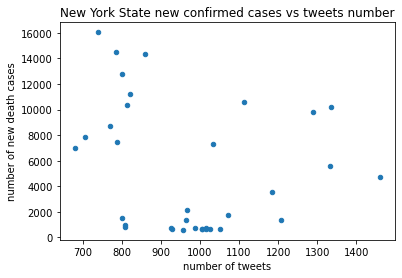

In [18]:
#the analysis toward New York
ny_twitter_df = covid_tweets_states_df[covid_tweets_states_df['States'] =='NY']
ny_twitter_df=ny_twitter_df[ny_twitter_df['Week_index']>15]

ny_twitter_df.plot.scatter(x = 'Count', y = 'new_cases', xlabel = 'number of tweets', ylabel = 'number of new death cases',title = 'New York State new confirmed cases vs tweets number')


<AxesSubplot:title={'center':'New York State new death cases vs tweets number'}, xlabel='number of tweets', ylabel='number of new death cases'>

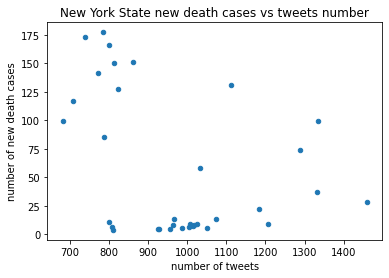

In [19]:
ny_twitter_df.plot.scatter( x = 'Count', y = 'new_deaths', xlabel = 'number of tweets', ylabel = 'number of new death cases',title = 'New York State new death cases vs tweets number')

<AxesSubplot:title={'center':'California new confirmed cases vs tweets number'}, xlabel='number of tweets', ylabel='number of new death cases'>

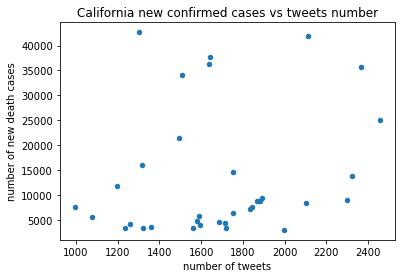

In [20]:
#the analysis toward California
california_twitter_df = covid_tweets_states_df[covid_tweets_states_df['States'] =='CA']
california_twitter_df=california_twitter_df[california_twitter_df['Week_index']>15]

california_twitter_df.plot.scatter(x = 'Count', y = 'new_cases', xlabel = 'number of tweets', ylabel = 'number of new death cases',title = 'California new confirmed cases vs tweets number')


<AxesSubplot:title={'center':'California new death cases vs tweets number'}, xlabel='number of tweets', ylabel='number of new death cases'>

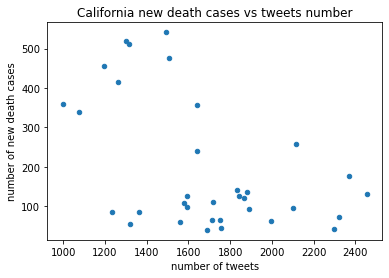

In [21]:
california_twitter_df.plot.scatter( x = 'Count', y = 'new_deaths', xlabel = 'number of tweets', ylabel = 'number of new death cases',title = 'California new death cases vs tweets number')

<AxesSubplot:title={'center':'Texas new Confirmed cases vs tweets number'}, xlabel='number of tweets', ylabel='number of new death cases'>

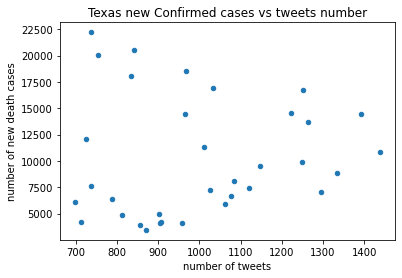

In [22]:
#the analysis toward Texas
tx_twitter_df = covid_tweets_states_df[covid_tweets_states_df['States'] =='TX']
tx_twitter_df=tx_twitter_df[tx_twitter_df['Week_index']>15]

tx_twitter_df.plot.scatter(x = 'Count', y = 'new_cases', xlabel = 'number of tweets', ylabel = 'number of new death cases',title = 'Texas new Confirmed cases vs tweets number')


<AxesSubplot:title={'center':'Texas new death cases vs tweets number'}, xlabel='number of tweets', ylabel='number of new death cases'>

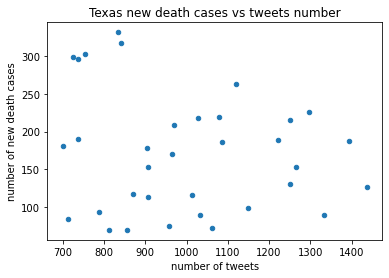

In [23]:
tx_twitter_df.plot.scatter( x = 'Count', y = 'new_deaths', xlabel = 'number of tweets', ylabel = 'number of new death cases',title = 'Texas new death cases vs tweets number')